In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parte 1

In [79]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_04087', 'pixel_04088', 'pixel_04089', 'pixel_04090',
       'pixel_04091', 'pixel_04092', 'pixel_04093', 'pixel_04094',
       'pixel_04095', 'label'],
      dtype='object', length=4097)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

## Ejercicio 2

In [80]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20)

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values
y = df['label'].values

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


## Ejercicio 3

Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2493, Acc=0.5123 | Test MSE=0.2507, Acc=0.4509
Iteración 200: Train MSE=0.2486, Acc=0.5123 | Test MSE=0.2502, Acc=0.4509
Iteración 300: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 400: Train MSE=0.2474, Acc=0.5237 | Test MSE=0.2491, Acc=0.4571
Iteración 500: Train MSE=0.2468, Acc=0.5406 | Test MSE=0.2486, Acc=0.4693
Iteración 600: Train MSE=0.2462, Acc=0.5666 | Test MSE=0.2481, Acc=0.4785
Iteración 700: Train MSE=0.2456, Acc=0.5965 | Test MSE=0.2476, Acc=0.5123
Iteración 800: Train MSE=0.2450, Acc=0.6133 | Test MSE=0.2472, Acc=0.5307
Iteración 900: Train MSE=0.2444, Acc=0.6233 | Test MSE=0.2467, Acc=0.5644
Iteración 1000: Train MSE=0.2438, Acc=0.6325 | Test MSE=0.2462, Acc=0.5736
Iteración 1100: Train MSE=0.2432, Acc=0.6378 | Test MSE=0.2457, Acc=0.6012
Iteración 1200: Train MSE=0.2426, Acc=0.6531 | Test MSE=0.2452, Acc=0.6166
Iteración 1300: Train MSE=0.2420, Acc

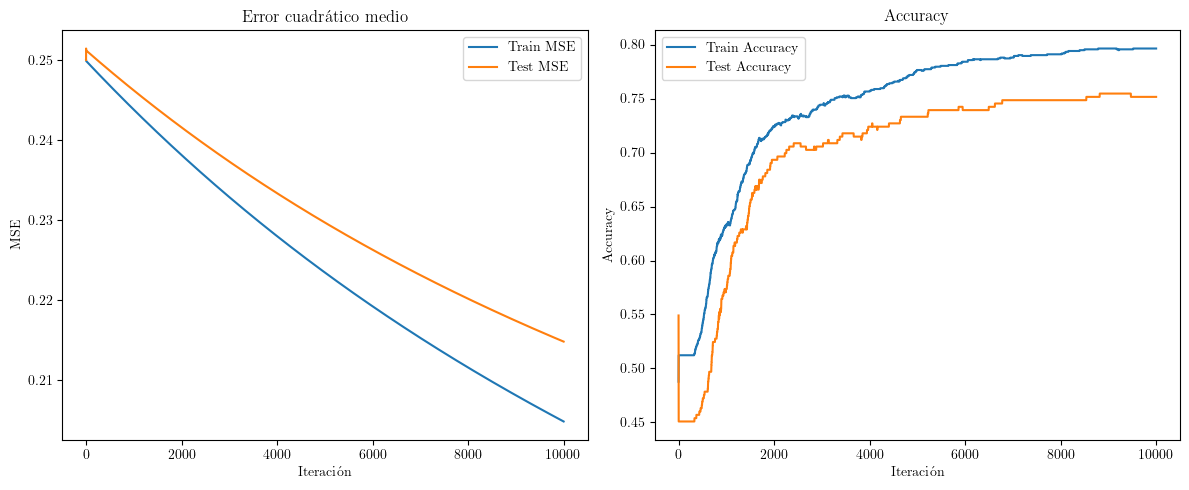

In [81]:
w_final, b_final, metrics = gradient_descent(X_train, y_train, X_test, y_test, alpha=1e-11, num_it=10000)
plot_metrics(metrics, save_path='graficos/1.png')

## Ejercicio 4


Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6975 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.6810
Iteración 1300: Train MSE=0.2381, Acc

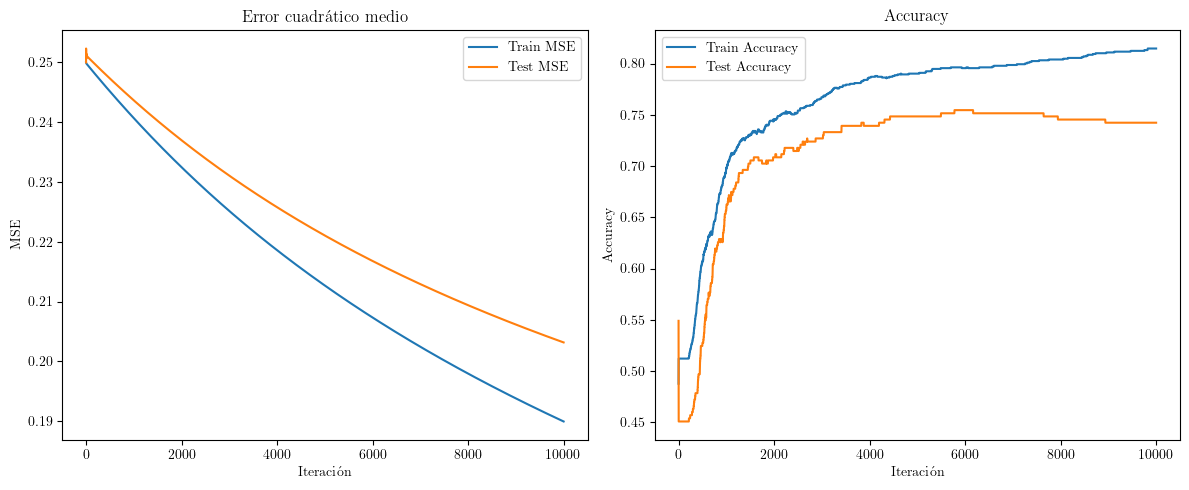

MSE final en Train: 0.1899
Accuracy final en Train: 0.8147
MSE final en Test: 0.2032
Accuracy final en Test: 0.7423


In [82]:
# Normalizamos los valores
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

plot_metrics(metrics, save_path='graficos/2.png')

print(f"MSE final en Train: {metrics['train_mse_list'][-1]:.4f}")
print(f"Accuracy final en Train: {metrics['train_acc_list'][-1]:.4f}")
print(f"MSE final en Test: {metrics['test_mse_list'][-1]:.4f}")
print(f"Accuracy final en Test: {metrics['test_acc_list'][-1]:.4f}")

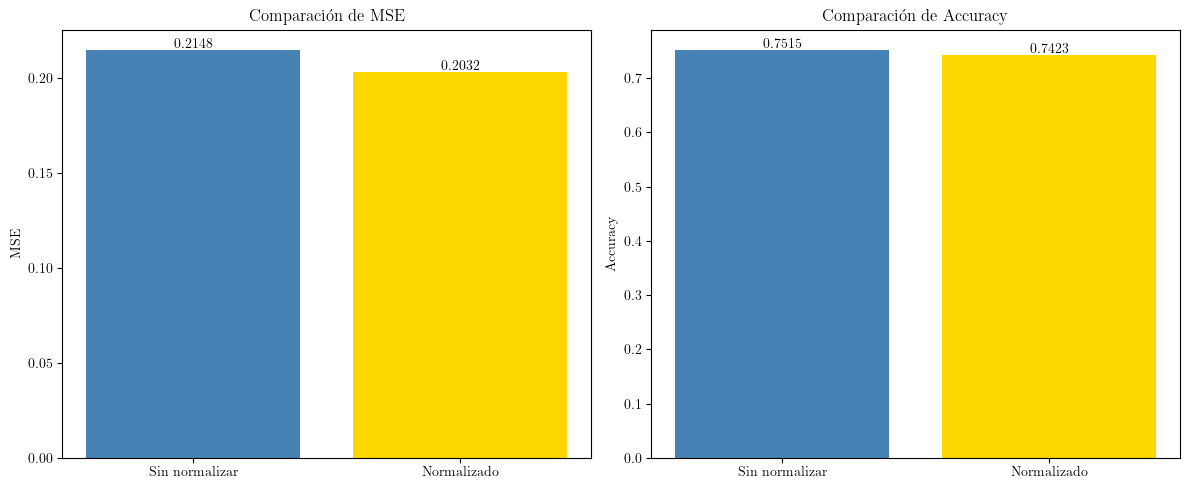

Mejora en MSE: 5.40%
Mejora en Accuracy: -1.22%


In [85]:
# Comparación de resultados con y sin normalización
non_norm_mse = 0.2148
non_norm_acc = 0.7515
norm_mse = 0.2032
norm_acc = 0.7423

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficamos la comparación de MSE
categories = ['Sin normalizar', 'Normalizado']
mse_values = [non_norm_mse, norm_mse]
colors = ['steelblue', 'gold']

ax1.bar(categories, mse_values, color=colors)
ax1.set_ylabel('MSE')
ax1.set_title('Comparación de MSE')
for i, v in enumerate(mse_values):
    ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Graficamos la comparación de accuracy
acc_values = [non_norm_acc, norm_acc]

ax2.bar(categories, acc_values, color=colors)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparación de Accuracy')
for i, v in enumerate(acc_values):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.savefig('graficos/3.png', dpi=300)
plt.tight_layout()
plt.show()

# Imprimir mejoras
mse_improvement = ((non_norm_mse - norm_mse) / non_norm_mse) * 100
acc_improvement = ((norm_acc - non_norm_acc) / non_norm_acc) * 100

print(f"Mejora en MSE: {mse_improvement:.2f}%")
print(f"Mejora en Accuracy: {acc_improvement:.2f}%")


## Ejercicio 5

In [90]:
#valores_alpha = [1e-6, 5*1e-7, 1e-7, 5*1e-8, 1e-8]
valores_alpha = [1e-6]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nDescenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=10000)
    alpha_mse_lists.append(metrics['test_mse_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])
    

plt.figure(figsize=(15, 6))

# Graficamos convergencia del MSE
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Convergencia del MSE para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuracy para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

#plt.savefig('graficos/4.png', dpi=300)
plt.tight_layout()
plt.show()


Descenso de gradiente para alpha = 1e-06
Iteración 0: Train MSE=0.2500, Acc=0.4877 | Test MSE=0.2500, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6975 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.

RuntimeError: latex was not able to process the following string:
b'\\u03b1 = 1e-06'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpmwiouthu d82b0243f1c02c56d3ee6e61c28df9ec.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./d82b0243f1c02c56d3ee6e61c28df9ec.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file d82b0243f1c02c56d3ee6e61c28df9ec.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character α (U+03B1)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily α
                   = 1e-06}%
No pages of output.
Transcript written on tmpmwiouthu/d82b0243f1c02c56d3ee6e61c28df9ec.log.




Error in callback <function _draw_all_if_interactive at 0x109667430> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u03b1 = 1e-06'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp8swnzuor d82b0243f1c02c56d3ee6e61c28df9ec.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./d82b0243f1c02c56d3ee6e61c28df9ec.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file d82b0243f1c02c56d3ee6e61c28df9ec.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character α (U+03B1)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily α
                   = 1e-06}%
No pages of output.
Transcript written on tmp8swnzuor/d82b0243f1c02c56d3ee6e61c28df9ec.log.




RuntimeError: latex was not able to process the following string:
b'\\u03b1 = 1e-06'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpfdtleb4q d82b0243f1c02c56d3ee6e61c28df9ec.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./d82b0243f1c02c56d3ee6e61c28df9ec.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file d82b0243f1c02c56d3ee6e61c28df9ec.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character α (U+03B1)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily α
                   = 1e-06}%
No pages of output.
Transcript written on tmpfdtleb4q/d82b0243f1c02c56d3ee6e61c28df9ec.log.




<Figure size 1500x600 with 2 Axes>

## Ejercicio 6


Tamaño: (32, 32)
Dataset guardado en processed_dataset_32.npz

--> Alpha: 4e-06
Iteración 0: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2502, Acc=0.4509
Iteración 100: Train MSE=0.2493, Acc=0.5123 | Test MSE=0.2506, Acc=0.4509
Iteración 200: Train MSE=0.2486, Acc=0.5123 | Test MSE=0.2501, Acc=0.4509
Iteración 300: Train MSE=0.2480, Acc=0.5130 | Test MSE=0.2496, Acc=0.4509
Iteración 400: Train MSE=0.2474, Acc=0.5260 | Test MSE=0.2491, Acc=0.4540
Iteración 500: Train MSE=0.2468, Acc=0.5521 | Test MSE=0.2486, Acc=0.4693
Iteración 600: Train MSE=0.2462, Acc=0.5674 | Test MSE=0.2481, Acc=0.4816
Iteración 700: Train MSE=0.2456, Acc=0.5888 | Test MSE=0.2475, Acc=0.4785
Iteración 800: Train MSE=0.2450, Acc=0.5965 | Test MSE=0.2471, Acc=0.5031
Iteración 900: Train MSE=0.2444, Acc=0.6110 | Test MSE=0.2466, Acc=0.5184
Iteración 1000: Train MSE=0.2438, Acc=0.6271 | Test MSE=0.2461, Acc=0.5307
Iteración 1100: Train MSE=0.2433, Acc=0.6371 | Test MSE=0.2456, Acc=0.5552
Iteración 1200: Train MSE=0.242

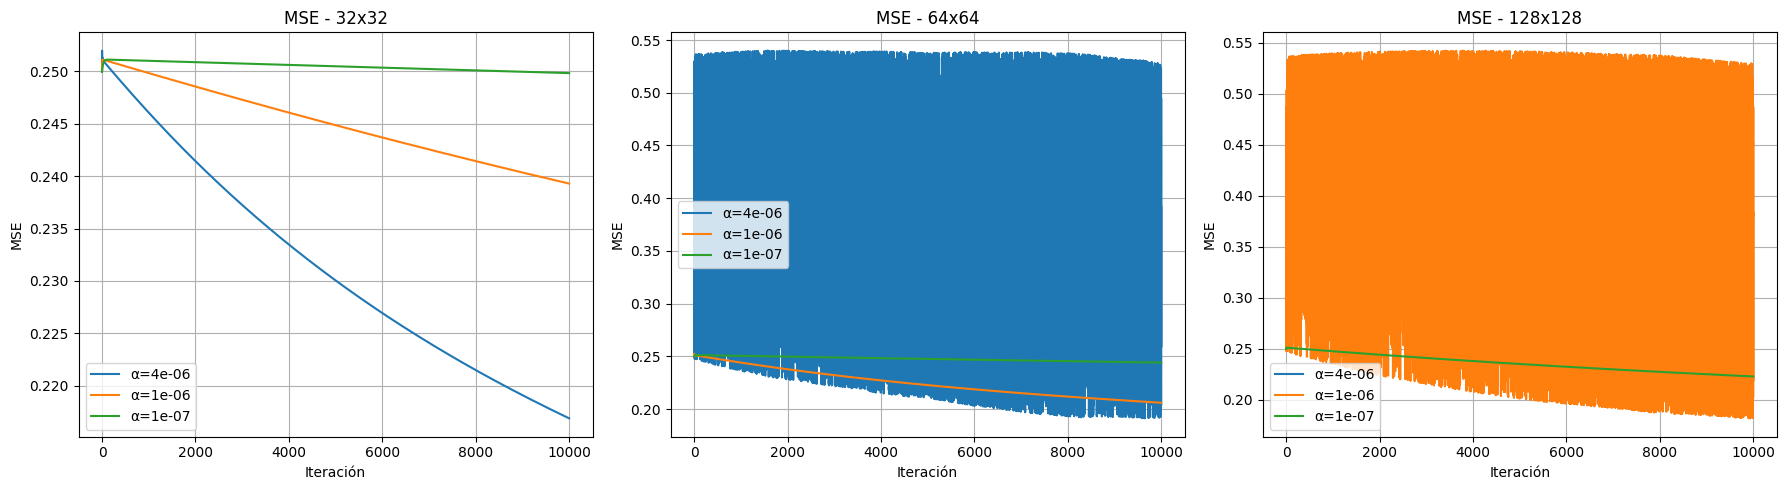

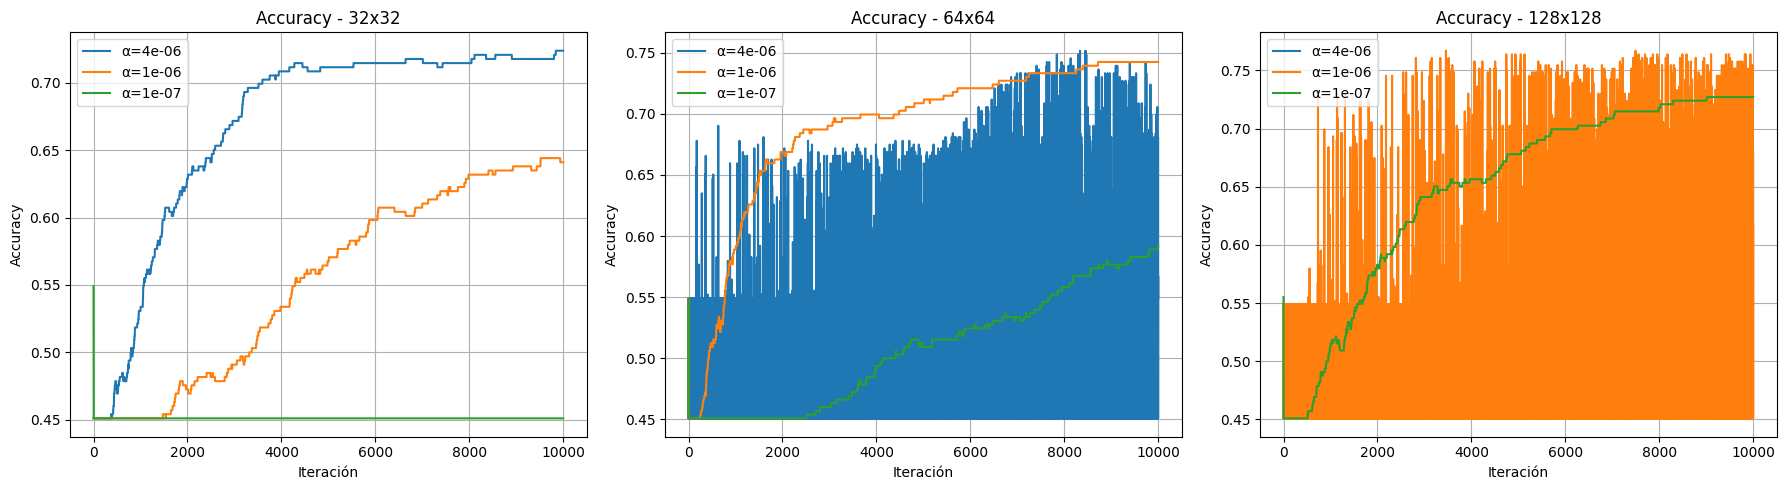

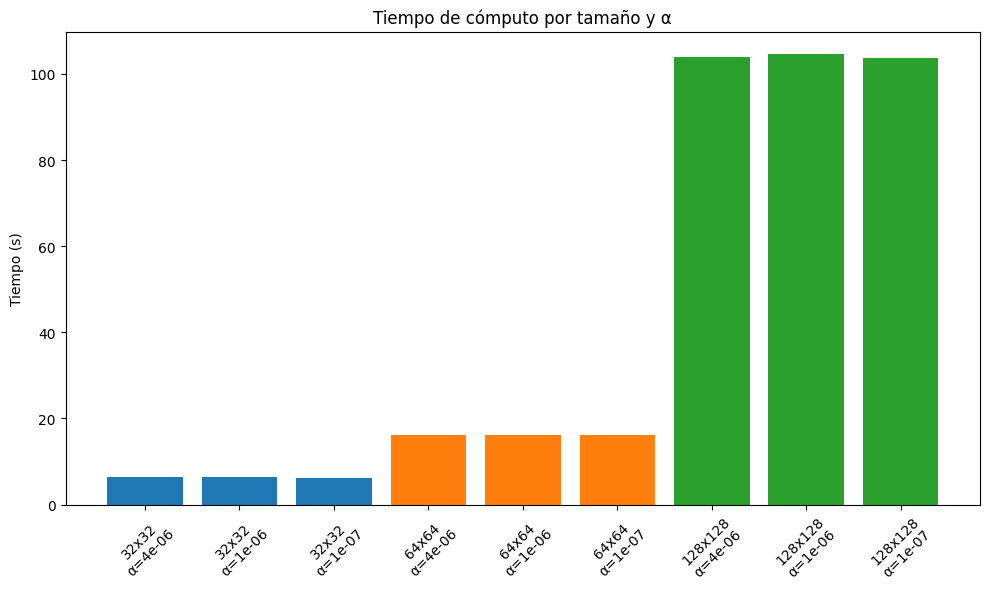

In [ ]:
import time
from pathlib import Path

# Resoluciones y alphas a probar
resolutions = [(32, 32), (64, 64), (128, 128)]
alphas_to_test = [4e-6, 1e-6, 1e-7]

# Para guardar resultados
results = []

for res in resolutions:
    print(f"\n=============================")
    print(f"Tamaño: {res}")
    print(f"=============================")

    healthy_dir = Path("DatasetTP/Healthy")
    parkinson_dir = Path("DatasetTP/Parkinson")

    processed_images = []
    labels = []

    for img_path in healthy_dir.glob("*.png"):
        img = process_image(img_path, target_size=res)
        if img is not None:
            processed_images.append(img)
            labels.append(0)

    for img_path in parkinson_dir.glob("*.png"):
        img = process_image(img_path, target_size=res)
        if img is not None:
            processed_images.append(img)
            labels.append(1)

    processed_images = np.array(processed_images)
    labels = np.array(labels)

    output_file = f"processed_dataset_{res[0]}.npz"
    save_processed_dataset(processed_images, labels, output_path=output_file)

    df = numpy_to_pandas_dataset(output_file)

    X = df.drop('label', axis=1).values
    y = df['label'].values

    # Split
    test_size = 0.2
    random_state = 42
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Normalizar
    X_train_norm = X_train / 255.0
    X_test_norm = X_test / 255.0

    for alpha in alphas_to_test:
        print(f"\n--> Alpha: {alpha}")

        start_time = time.time()
        w_final, b_final, metrics = gradient_descent(
            X_train_norm, y_train, X_test_norm, y_test,
            alpha=alpha, num_it=10000
        )
        end_time = time.time()
        elapsed_time = end_time - start_time

        final_acc = metrics['test_acc_list'][-1]
        final_mse = metrics['test_mse_list'][-1]

        # Guardar resultados
        results.append({
            'size': f"{res[0]}x{res[1]}",
            'alpha': alpha,
            'metrics': metrics,
            'time': elapsed_time,
            'final_acc': final_acc,
            'final_mse': final_mse
        })

        print(f"Accuracy final: {final_acc:.4f}")
        print(f"MSE final: {final_mse:.4f}")
        print(f"Tiempo: {elapsed_time:.2f}s")

# ================================
# Gráficos de MSE (3 subplots)
# ================================

plt.figure(figsize=(18, 5))
for i, res in enumerate(resolutions):
    plt.subplot(1, 3, i + 1)
    for alpha in alphas_to_test:
        # Filtrar resultados correspondientes
        m = next(item for item in results if item['size'] == f"{res[0]}x{res[1]}" and item['alpha'] == alpha)
        plt.plot(m['metrics']['test_mse_list'], label=f'α={alpha:.0e}')
    plt.xlabel('Iteración')
    plt.ylabel('MSE')
    plt.title(f"MSE - {res[0]}x{res[1]}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('graficos/5.png', dpi=300)
plt.show()

# ================================
# Gráficos de Accuracy (3 subplots)
# ================================

plt.figure(figsize=(18, 5))
for i, res in enumerate(resolutions):
    plt.subplot(1, 3, i + 1)
    for alpha in alphas_to_test:
        m = next(item for item in results if item['size'] == f"{res[0]}x{res[1]}" and item['alpha'] == alpha)
        plt.plot(m['metrics']['test_acc_list'], label=f'α={alpha:.0e}')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy')
    plt.title(f"Accuracy - {res[0]}x{res[1]}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('graficos/6.png', dpi=300)
plt.show()

# ================================
# Gráfico de barras de tiempo
# ================================

import pandas as pd

df_summary = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
for size in df_summary['size'].unique():
    subset = df_summary[df_summary['size'] == size]
    plt.bar([f"{size}\nα={a:.0e}" for a in subset['alpha']], subset['time'], label=size)

plt.ylabel('Tiempo (s)')
plt.title('Tiempo de cómputo por tamaño y α')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graficos/7.png', dpi=300)
plt.show()


# Ejercicio 6: concluciones

En este experimento se estudió cómo influye el tamaño de escalado de las imágenes en la efectividad del método y en el tiempo de cómputo. Para analizarlo, se procesaron imágenes en tres tamaños distintos: 32×32, 64×64 y 128×128. En cada caso, se probaron tres tasas de aprendizaje diferentes (α = 4e-6, 1e-6 y 1e-7), lo que permitió observar el comportamiento completo en cada escenario.

Los resultados muestran que, para imágenes de 32×32, la tasa de aprendizaje más alta (α = 4e-6) logró la mejor precisión, alcanzando alrededor de 0.72, con un MSE final que también disminuyó de forma constante. Con α = 1e-6 la precisión fue más baja y la curva subió más lentamente, mientras que con α = 1e-7 prácticamente no hubo aprendizaje y las curvas se mantuvieron planas. Además, el tiempo de cómputo fue bajo (alrededor de 7 segundos), lo que hace a este tamaño muy eficiente si se usa un α bien elegido.

En el caso de 64×64, se observó que la tasa α = 1e-6 permitió alcanzar la mejor precisión, cerca de 0.75, con curvas estables y una disminución clara del error. Al usar α = 4e-6, el modelo presentó oscilaciones fuertes en las curvas de accuracy y MSE, indicando un comportamiento inestable (similar a un "serrucho") y una tendencia al overfitting. Con α = 1e-7, el aprendizaje fue más lento y se llegó a una precisión final más baja. El tiempo de cómputo se mantuvo en un rango intermedio (alrededor de 17 segundos).

Para imágenes de 128×128, la tasa de aprendizaje α = 1e-7 fue la única que permitió un aprendizaje estable, alcanzando una precisión aproximada de 0.74 y un descenso progresivo del MSE. Al usar α = 1e-6 o 4e-6, las curvas fueron muy inestables, con grandes oscilaciones y sin una mejora real en precisión, reflejando claramente overfitting y una falta de convergencia. El tiempo de cómputo en este caso fue el más alto, superando los 100 segundos para cada prueba, debido al mayor tamaño y la complejidad computacional.

Estos resultados confirman que aumentar el tamaño de las imágenes no implica automáticamente una mejora en la precisión. De hecho, si no se elige una tasa de aprendizaje adecuada, pueden aparecer comportamientos inestables y se puede perder capacidad de generalización. Por ejemplo, con un α muy grande en imágenes grandes, se observan fuertes oscilaciones en las curvas (línea tipo serrucho), mientras que con α muy pequeño el método avanza extremadamente lento y las curvas quedan planas.

Una conclusión clave es que, con un ajuste fino de α, incluso tamaños más pequeños como 32×32 podrían alcanzar resultados similares o superiores a tamaños grandes, pero con un tiempo de cómputo mucho menor. Esto demuestra que la clave no está solamente en el tamaño de la imagen, sino en encontrar la combinación correcta entre tamaño y tasa de aprendizaje. Ajustar α permite aprovechar al máximo la información de cada imagen y evitar tanto la falta de aprendizaje como el overfitting.

En resumen, el tamaño de las imágenes y la tasa de aprendizaje están íntimamente relacionados y tienen un impacto directo tanto en la efectividad como en el tiempo de cómputo. En este análisis, el tamaño 64×64 mostró un buen equilibrio entre precisión y tiempo, pero también quedó claro que se pueden lograr resultados competitivos con imágenes más pequeñas si se selecciona un α adecuado. Por otro lado, las imágenes grandes pueden tener potencial para alta precisión, pero requieren mucho más tiempo y un ajuste mucho más delicado para evitar inestabilidad. Este estudio destaca la importancia de experimentar con distintos α y tamaños, analizar cuidadosamente las curvas y buscar un balance entre eficiencia y rendimiento.

## Ejercicio 7

In [27]:
def confusion_matrix(y_true, y_pred):
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    return np.array([[TN, FP],
                     [FN, TP]])

In [58]:
alpha = 1e-6
w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha, 10000)

Iteración 0: Train MSE=0.2500, Acc=0.5092 | Test MSE=0.2501, Acc=0.4571
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2479, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4877
Iteración 500: Train MSE=0.2451, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6263 | Test MSE=0.2466, Acc=0.5706
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6166
Iteración 900: Train MSE=0.2415, Acc=0.6792 | Test MSE=0.2444, Acc=0.6258
Iteración 1000: Train MSE=0.2407, Acc=0.6960 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7113 | Test MSE=0.2429, Acc=0.6656
Iteración 1200: Train MSE=0.2389, Acc=0.7182 | Test MSE=0.2423, Acc=0.6840
Iteración 1300: Train MSE=0.2381, Acc

In [59]:
y_pred_probs = predict(X_test_norm, w_final, b_final)

# Usamos un umbral para convertir los labels de y_pred a 0 y 1
y_pred = (y_pred_probs >= 0.5).astype(int)

cm = confusion_matrix(y_pred, y_test)
cm

array([[122,  27],
       [ 57, 120]])

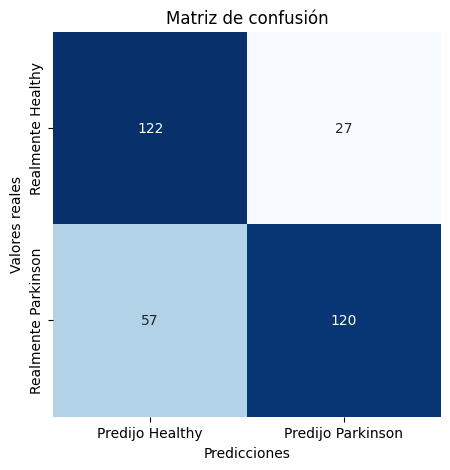

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predijo Healthy', 'Predijo Parkinson'],
            yticklabels=['Realmente Healthy', 'Realmente Parkinson'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.savefig('graficos/8.png', dpi=300)
plt.show()

# Parte 2

## Ejercicio 2

In [52]:
w_final, b_final, metrics = gradient_ascent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

Iteración 0: Train LogLoss=0.6931 , Acc=0.5123| Test LogLoss=0.6934, Acc=0.4509
Iteración 100: Train LogLoss=0.6920 , Acc=0.5123| Test LogLoss=0.6947, Acc=0.4509
Iteración 200: Train LogLoss=0.6910 , Acc=0.5123| Test LogLoss=0.6939, Acc=0.4509
Iteración 300: Train LogLoss=0.6900 , Acc=0.5123| Test LogLoss=0.6932, Acc=0.4509
Iteración 400: Train LogLoss=0.6891 , Acc=0.5123| Test LogLoss=0.6924, Acc=0.4509
Iteración 500: Train LogLoss=0.6881 , Acc=0.5214| Test LogLoss=0.6916, Acc=0.4571
Iteración 600: Train LogLoss=0.6872 , Acc=0.5306| Test LogLoss=0.6908, Acc=0.4601
Iteración 700: Train LogLoss=0.6862 , Acc=0.5467| Test LogLoss=0.6901, Acc=0.4755
Iteración 800: Train LogLoss=0.6853 , Acc=0.5674| Test LogLoss=0.6893, Acc=0.4816
Iteración 900: Train LogLoss=0.6844 , Acc=0.5911| Test LogLoss=0.6885, Acc=0.4969
Iteración 1000: Train LogLoss=0.6834 , Acc=0.6057| Test LogLoss=0.6878, Acc=0.5276
Iteración 1100: Train LogLoss=0.6825 , Acc=0.6172| Test LogLoss=0.6870, Acc=0.5429
Iteración 1200: 

## Ejercicio 3

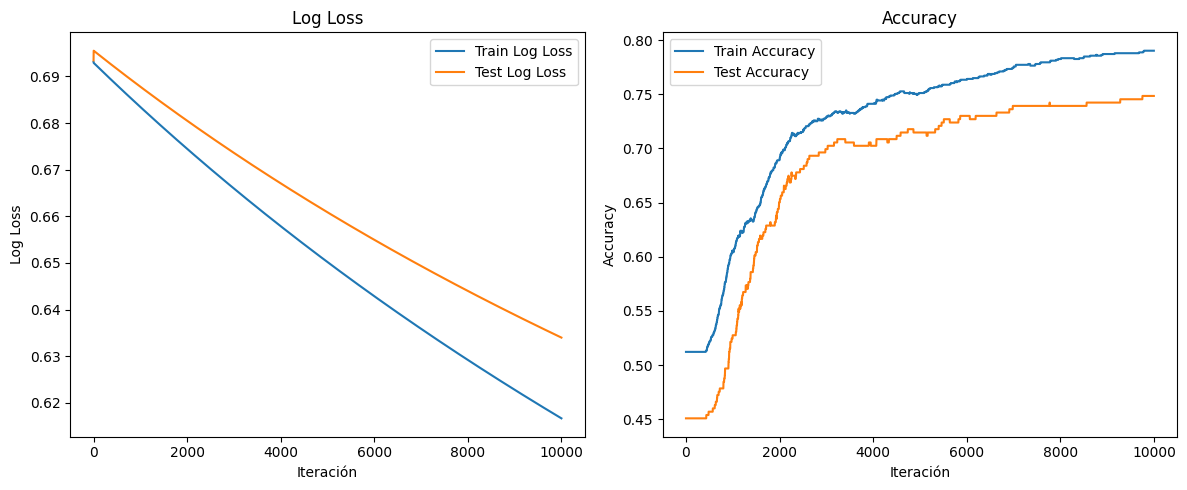

In [ ]:
plot_metrics(metrics, save_path='graficos/9.png')

## Ejercicio 4


Ascenso de gradiente para alpha = 1e-06
Iteración 0: Train LogLoss=0.6931 , Acc=0.5123| Test LogLoss=0.6933, Acc=0.4509
Iteración 100: Train LogLoss=0.6919 , Acc=0.5123| Test LogLoss=0.6947, Acc=0.4509
Iteración 200: Train LogLoss=0.6910 , Acc=0.5123| Test LogLoss=0.6939, Acc=0.4509
Iteración 300: Train LogLoss=0.6900 , Acc=0.5123| Test LogLoss=0.6932, Acc=0.4509
Iteración 400: Train LogLoss=0.6890 , Acc=0.5123| Test LogLoss=0.6924, Acc=0.4509
Iteración 500: Train LogLoss=0.6881 , Acc=0.5222| Test LogLoss=0.6916, Acc=0.4571
Iteración 600: Train LogLoss=0.6871 , Acc=0.5306| Test LogLoss=0.6908, Acc=0.4601
Iteración 700: Train LogLoss=0.6862 , Acc=0.5505| Test LogLoss=0.6901, Acc=0.4724
Iteración 800: Train LogLoss=0.6853 , Acc=0.5674| Test LogLoss=0.6893, Acc=0.4785
Iteración 900: Train LogLoss=0.6843 , Acc=0.5911| Test LogLoss=0.6885, Acc=0.5000
Iteración 1000: Train LogLoss=0.6834 , Acc=0.6049| Test LogLoss=0.6878, Acc=0.5276
Iteración 1100: Train LogLoss=0.6825 , Acc=0.6164| Test Lo

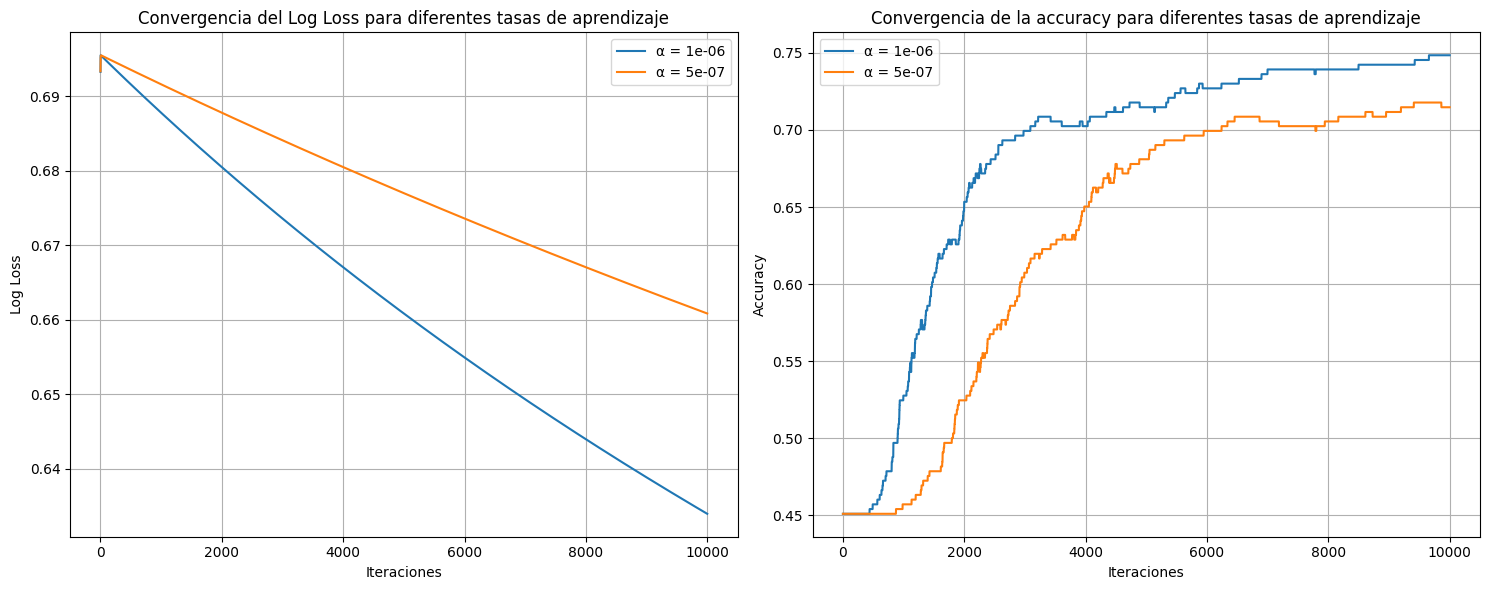

In [ ]:
valores_alpha = [1e-6, 5e-7]
alpha_log_loss_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nAscenso de gradiente para alpha = {alpha}")
    w_final, b_final, metrics = gradient_ascent(X_train_norm, y_train, X_test_norm, y_test, alpha=alpha, num_it=10000)
    alpha_log_loss_lists.append(metrics['test_log_loss_list'])
    alpha_acc_lists.append(metrics['test_acc_list'])
    

plt.figure(figsize=(15, 6))

# Graficamos convergencia del Log Loss
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_log_loss_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Log Loss')
plt.title('Convergencia del Log Loss para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuracy para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('graficos/10.png', dpi=300)
plt.show()

## Ejercicio 5